# Advanced Statistics Project By Kushal Singhal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols #For n way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n way ANOVA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Salary.csv')

In [4]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [5]:
d1=df.groupby(['Education','Occupation'])

In [6]:
d1.mean()

Salary
Education  Occupation                     
 Bachelors  Adm-clerical     170711.000000
            Exec-managerial  193201.750000
            Prof-specialty   105787.750000
            Sales            192300.750000
 Doctorate  Adm-clerical     166457.750000
            Exec-managerial  212781.000000
            Prof-specialty   247772.833333
            Sales            193916.600000
 HS-grad    Adm-clerical      78759.666667
            Prof-specialty    95534.333333
            Sales             50822.333333

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [9]:
df.columns

Index(['Education', 'Occupation', 'Salary'], dtype='object')

In [10]:
df.shape

(40, 3)

In [11]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

<AxesSubplot:>

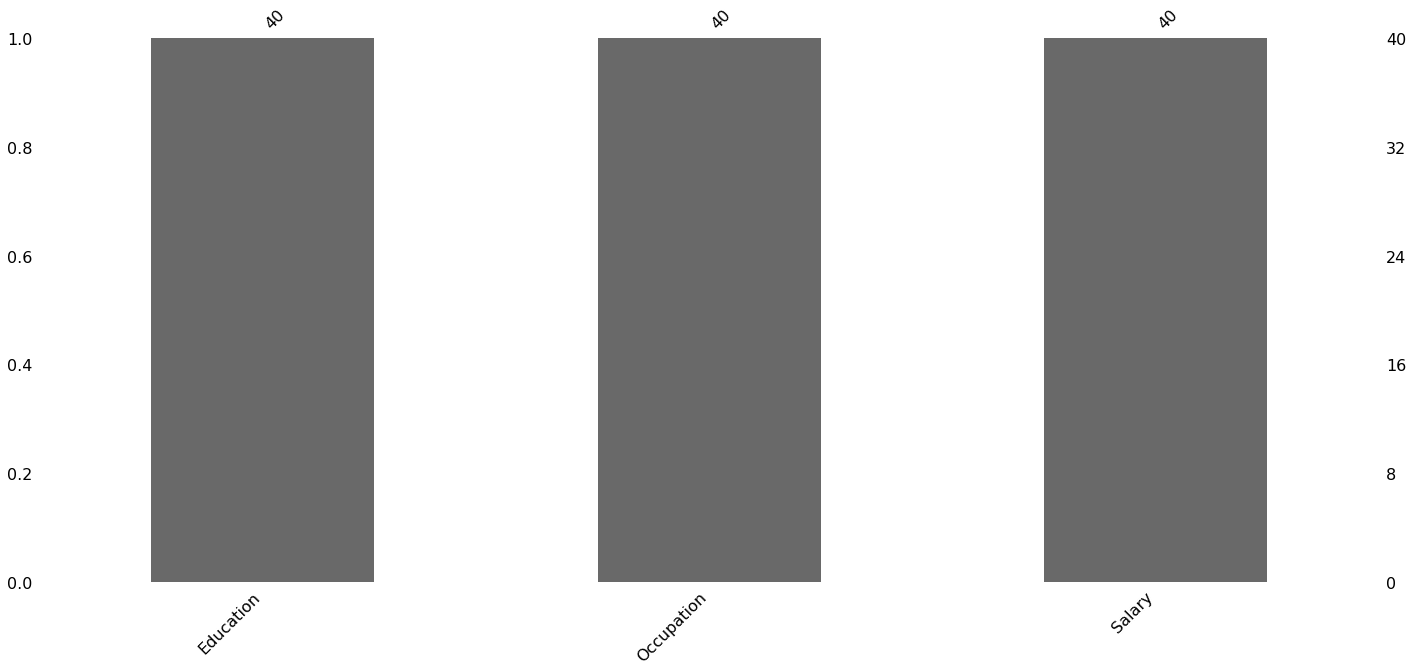

In [12]:
import missingno
missingno.bar(df)

In [13]:
df.Education.unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [14]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [15]:
df.Occupation.unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

## ONE WAY ANOVA

In [16]:
formula='Salary~C(Education)'
model=ols(formula, df).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

#### Since pr<.05,this implies that 𝜇 Sal for 3 levels of Education are not same.This also means that Education has a significant impact on Salary. We can say that with 95% confidence level

In [17]:
mod = ols('Salary ~ Education', data = df).fit()
aov_table=anova_lm(mod,type=1)

In [18]:
aov_table

df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN

In [19]:
mod = ols('Salary ~ Occupation', data = df).fit()
aov_table=anova_lm(mod,type=1)

In [20]:
aov_table

df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN

#### Since pr > 0.05 for Occupation, Null will not rejected; this implies that 𝜇 Sal for 4 Occupations are same. This also means that Occupation does not have a significant impact on Salary.

In [21]:
## Two Way ANOVA
formula='Salary~Education+Occupation'
model=ols(formula, df).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq          F        PR(>F)
Education    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
Occupation   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual    34.0  5.585261e+10  1.642724e+09        NaN           NaN

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

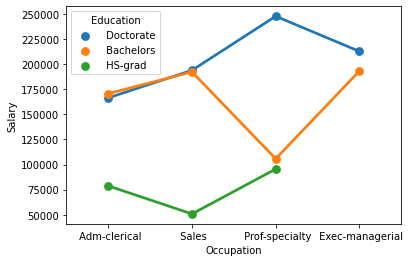

In [22]:
sns.pointplot(x='Occupation', y='Salary',data= df,hue='Education',ci=None)

In [ ]:
sns.pointplot(x='Education', y='Salary',data= df,hue='Occupation',ci=None)

In [25]:
##TWO WAY ANOVA WITH INTERACTION
formula='Salary~Education+Occupation+Education:Occupation'
model=ols(formula, df).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq          F  \
Education              2.0  1.026955e+11  5.134773e+10  72.211958   
Occupation             3.0  5.519946e+09  1.839982e+09   2.587626   
Education:Occupation   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual              29.0  2.062102e+10  7.110697e+08        NaN   

                            PR(>F)  
Education             5.466264e-12  
Occupation            7.211580e-02  
Education:Occupation  2.232500e-05  
Residual                       NaN

<AxesSubplot:>

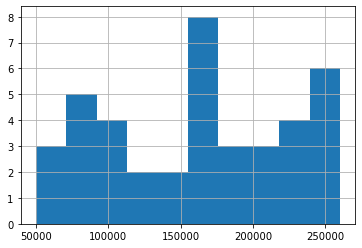

In [26]:
df.Salary.hist()

<AxesSubplot:xlabel='Salary'>

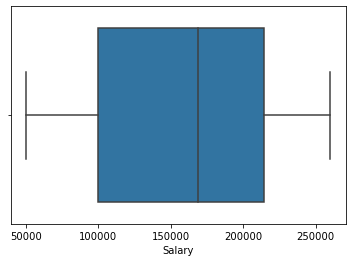

In [27]:
sns.boxplot(df.Salary)

In [28]:
df.groupby('Occupation')['Salary'].mean()

Occupation
 Adm-clerical       141424.300000
 Exec-managerial    197117.600000
 Prof-specialty     168953.153846
 Sales              157604.416667
Name: Salary, dtype: float64

In [29]:
df.groupby('Education')['Salary'].mean()

Education
 Bachelors    165152.933333
 Doctorate    208427.000000
 HS-grad       75038.777778
Name: Salary, dtype: float64

## EDA & PCA

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import itertools


In [26]:
df_dict=pd.read_excel('Data Dictionary.xlsx')
df_dict

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

In [7]:
df=pd.read_csv('download-7.csv')

## Basic Data Exploration
#### 1. Head of Dataset
#### 2. Info of Dataset
#### 3. Shape of the Dataset
#### 4. Desription of the Dataset

In [8]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
df.shape

(777, 18)

In [7]:
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

## Check for the Columns



In [9]:
df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [10]:
## Removing the space and special characters between words
df.columns = df.columns.str.replace('.', '_')

<ipython-input-10-562267a9ebe7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [11]:
## Fixing the column names(dataframe method)

df.rename(columns ={'perc_alumni':'Perc_Alumni'}, inplace =True)

In [12]:
df.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'Perc_Alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [14]:
## Checking the summary
df.describe().round(2)

Apps    Accept   Enroll  Top10perc  Top25perc  F_Undergrad  \
count    777.00    777.00   777.00     777.00      777.0       777.00   
mean    3001.64   2018.80   779.97      27.56       55.8      3699.91   
std     3870.20   2451.11   929.18      17.64       19.8      4850.42   
min       81.00     72.00    35.00       1.00        9.0       139.00   
25%      776.00    604.00   242.00      15.00       41.0       992.00   
50%     1558.00   1110.00   434.00      23.00       54.0      1707.00   
75%     3624.00   2424.00   902.00      35.00       69.0      4005.00   
max    48094.00  26330.00  6392.00      96.00      100.0     31643.00   

       P_Undergrad  Outstate  Room_Board    Books  Personal     PhD  Terminal  \
count       777.00    777.00      777.00   777.00    777.00  777.00    777.00   
mean        855.30  10440.67     4357.53   549.38   1340.64   72.66     79.70   
std        1522.43   4023.02     1096.70   165.11    677.07   16.33     14.72   
min           1.00   2340.00     1780.00    96.00    250.00    8.00     24.00   
25%          95.00   7320.00     3597.00   470.00    850.00   62.00     71.00   
50%         353.00   9990.00     4200.00   500.00   1200.00   75.00     82.00   
75%         967.00  12925.00     5050.00   600.00   1700.00   85.00     92.00   
max       21836.00  21700.00     8124.00  2340.00   6800.00  103.00    100.00   

       S_F_Ratio  Perc_Alumni    Expend  Grad_Rate  
count     777.00       777.00    777.00     777.00  
mean       14.09        22.74   9660.17      65.46  
std         3.96        12.39   5221.77      17.18  
min         2.50         0.00   3186.00      10.00  
25%        11.50        13.00   6751.00      53.00  
50%        13.60        21.00   8377.00      65.00  
75%        16.50        31.00  10830.00      78.00  
max        39.80        64.00  56233.00     118.00

**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights: </b><br>1. Total of 18 columns with 777 rows are present.
        <br>2. There are 16 Integer, 1 Float and 1 object columns.
        <br>3. There are no Null Values present in the dataset.
        <br>4. There are no duplicate rows present in the dataset
    </span>    
</div

## Outliers

In [15]:
def boxplot_numeric(column):

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

BoxPlot of Apps
----------------------------------------------------------------------------


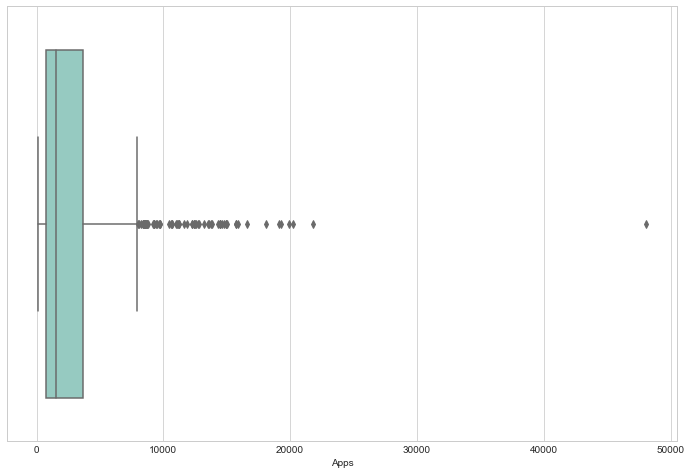

BoxPlot of Accept
----------------------------------------------------------------------------


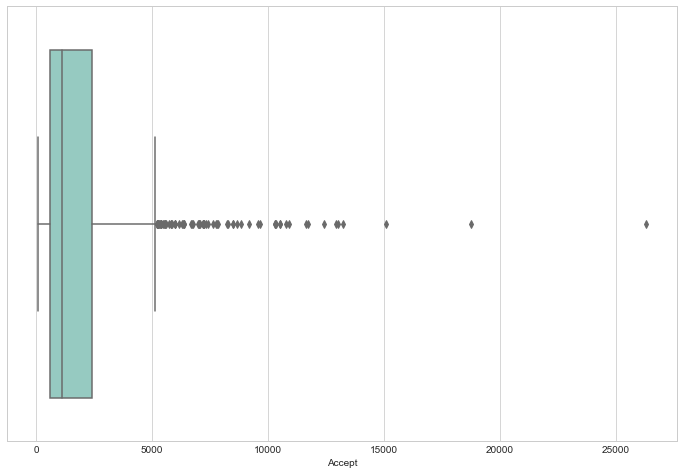

BoxPlot of Enroll
----------------------------------------------------------------------------


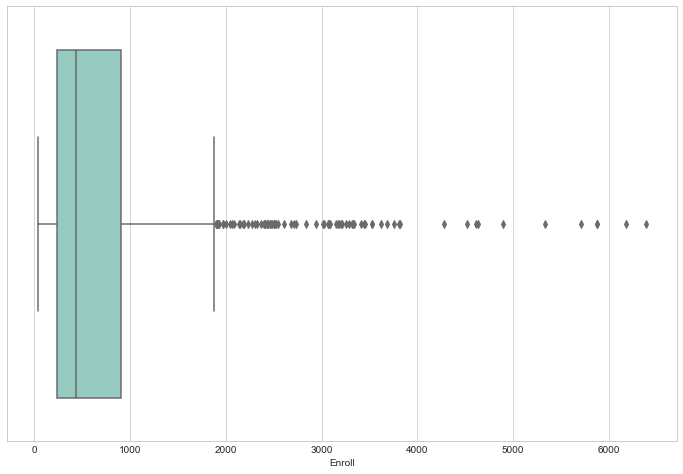

BoxPlot of Top10perc
----------------------------------------------------------------------------


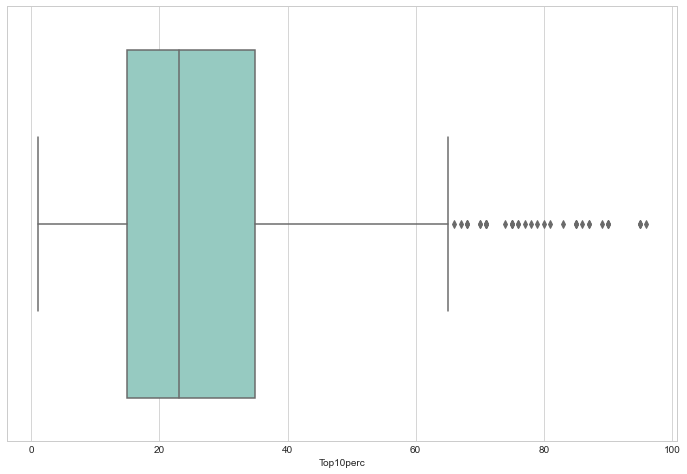

BoxPlot of Top25perc
----------------------------------------------------------------------------


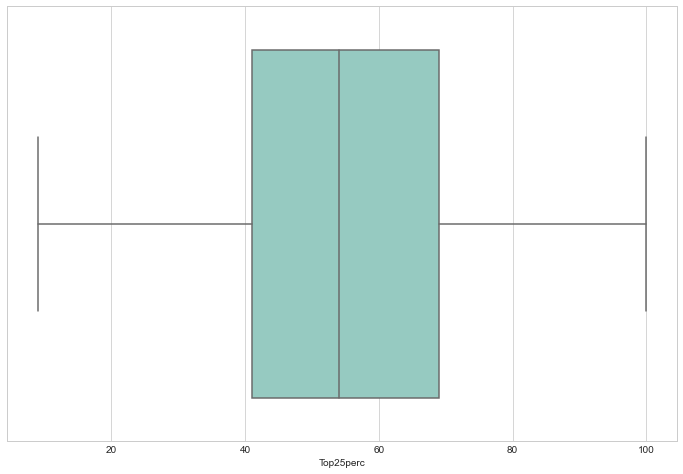

BoxPlot of F_Undergrad
----------------------------------------------------------------------------


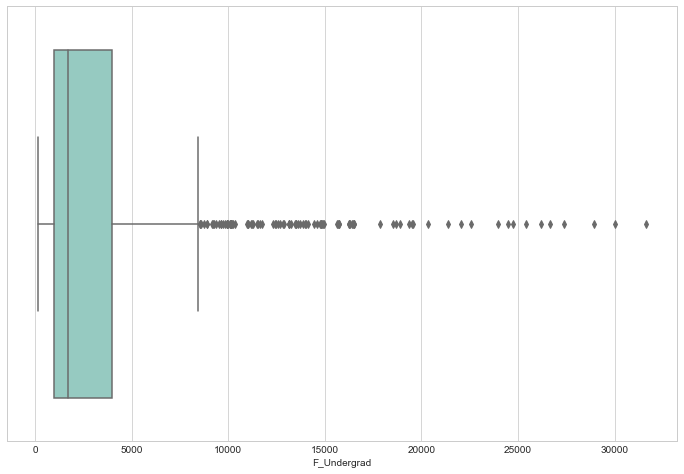

BoxPlot of P_Undergrad
----------------------------------------------------------------------------


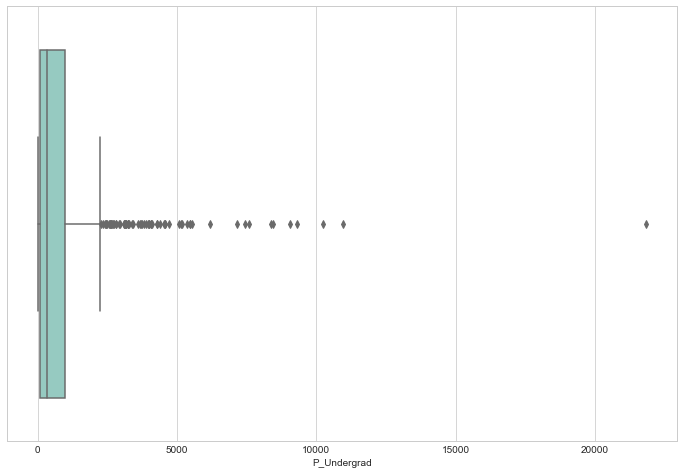

BoxPlot of Outstate
----------------------------------------------------------------------------


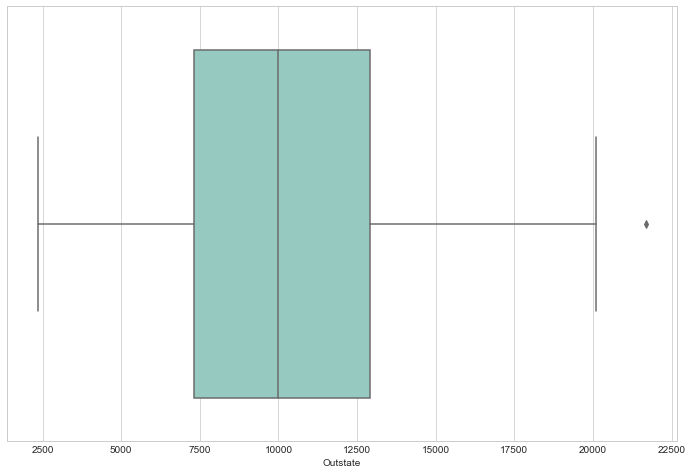

BoxPlot of Room_Board
----------------------------------------------------------------------------


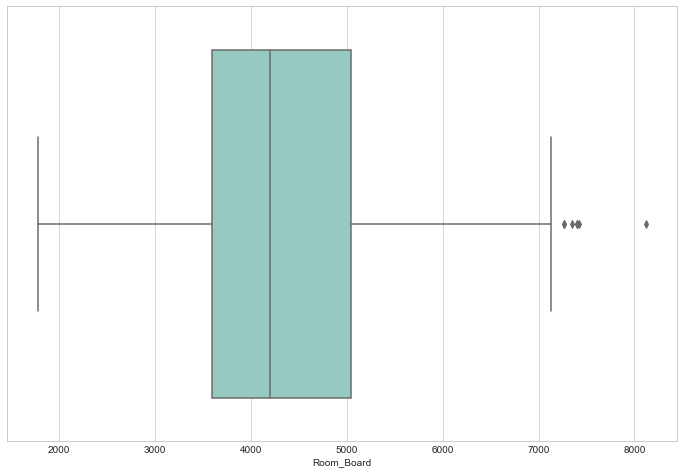

BoxPlot of Books
----------------------------------------------------------------------------


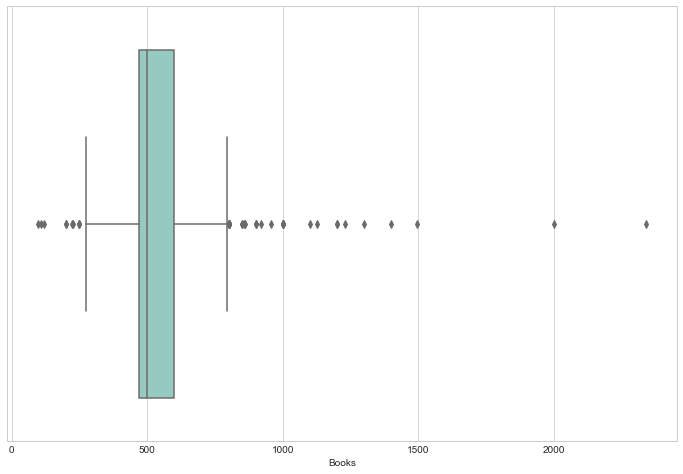

BoxPlot of Personal
----------------------------------------------------------------------------


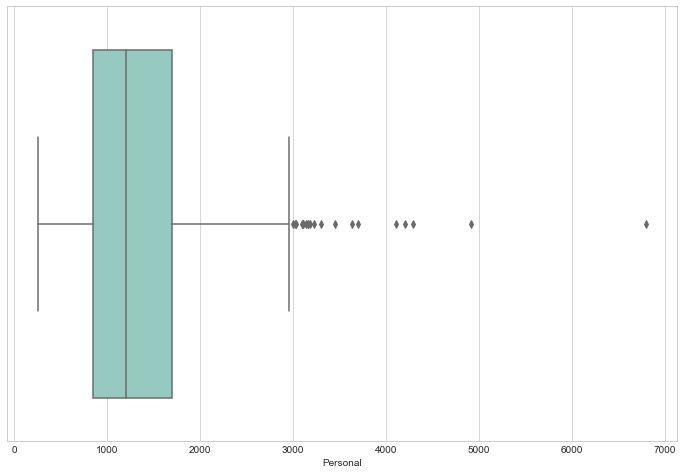

BoxPlot of PhD
----------------------------------------------------------------------------


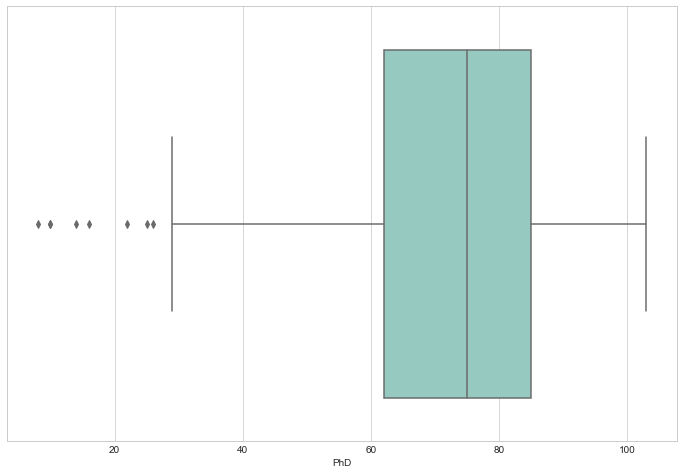

BoxPlot of Terminal
----------------------------------------------------------------------------


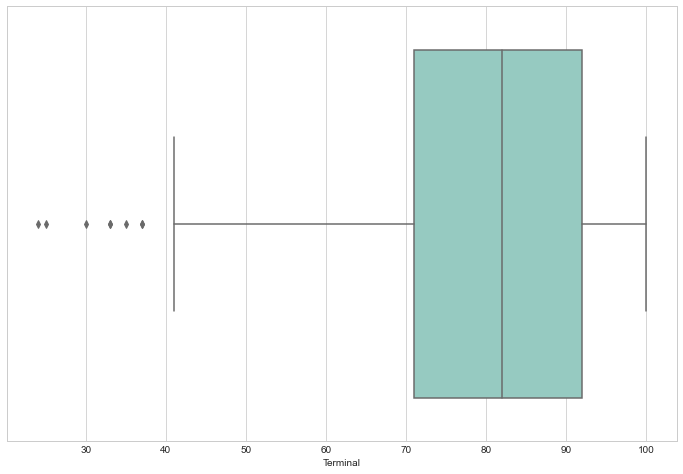

BoxPlot of S_F_Ratio
----------------------------------------------------------------------------


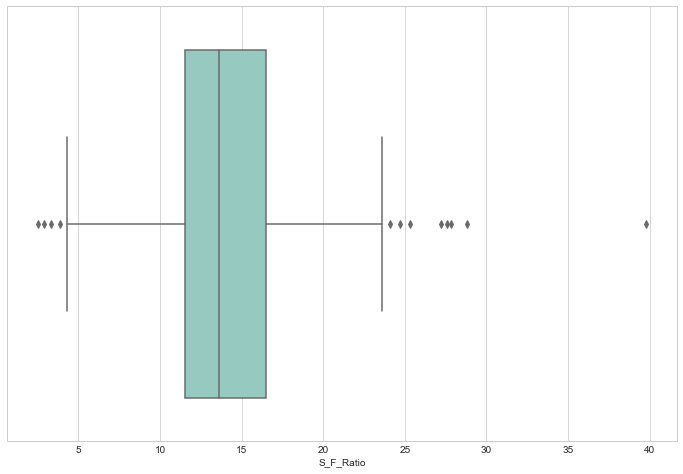

BoxPlot of Perc_Alumni
----------------------------------------------------------------------------


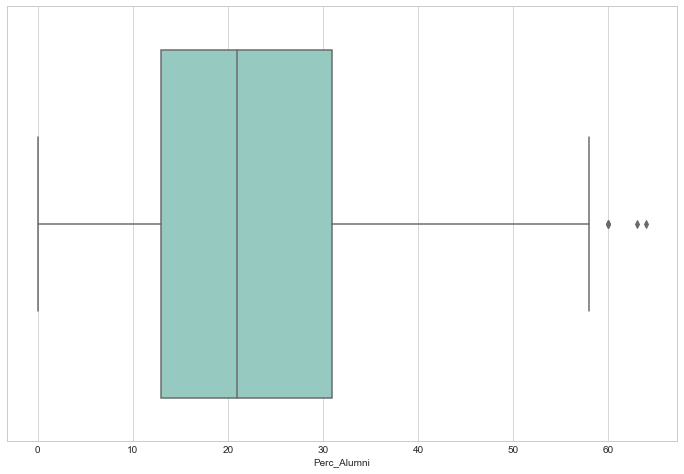

BoxPlot of Expend
----------------------------------------------------------------------------


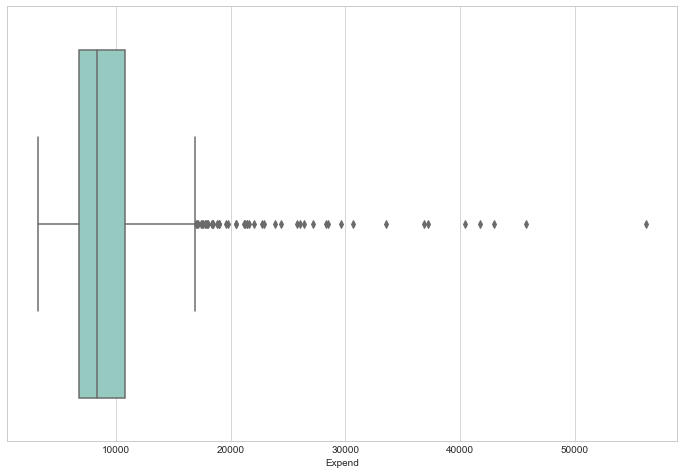

BoxPlot of Grad_Rate
----------------------------------------------------------------------------


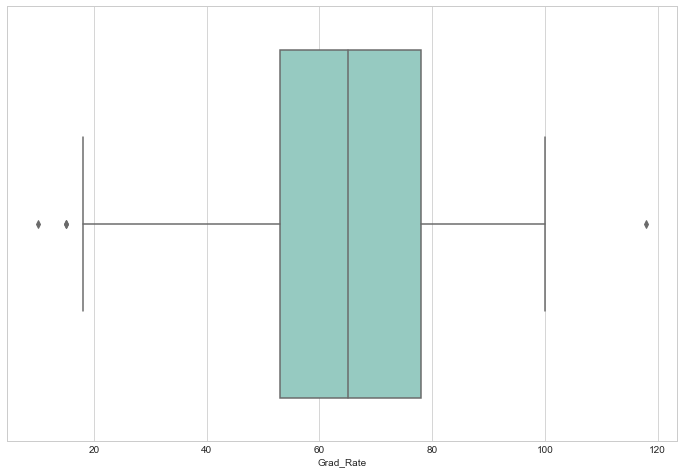

In [17]:
for x in lstnumericcolumns:
    boxplot_numeric(x)

In [18]:
df_num=df.drop(['Names'],axis=1)

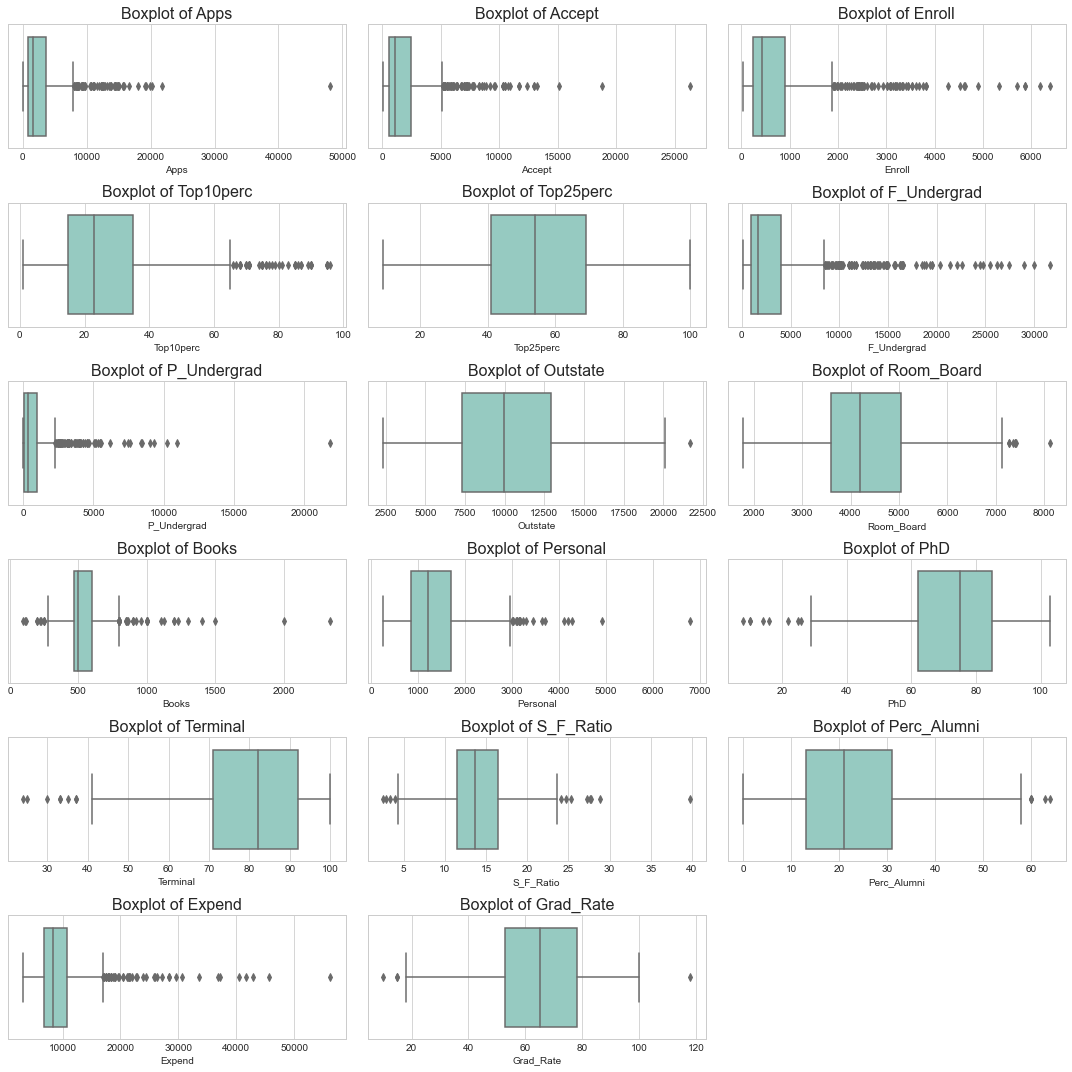

In [19]:
plt.figure(figsize=(15,15))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(6,3,i+1)
    sns.boxplot(x = df_num[list_of_column[i]],data=df_num)
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()
    

## Univariate Analysis



In [20]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print('/b')
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde =True,color ='purple', bins=50);
    plt.title('Distribution of '+ column)
    plt.show()
    
    plt.figure()
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.title('BoxPlot of '+ column)


    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 /b
----------------------------------------------------------------------------


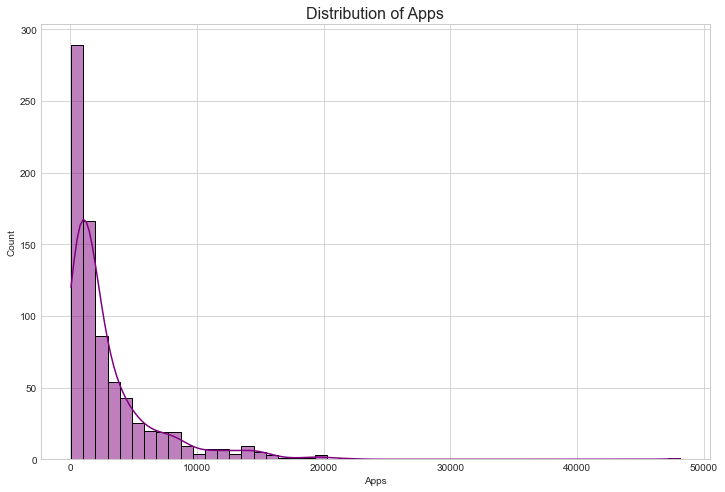

----------------------------------------------------------------------------


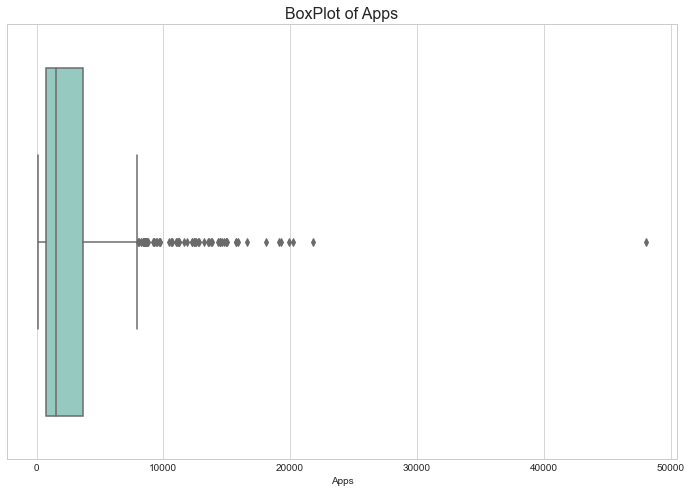

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 /b
----------------------------------------------------------------------------


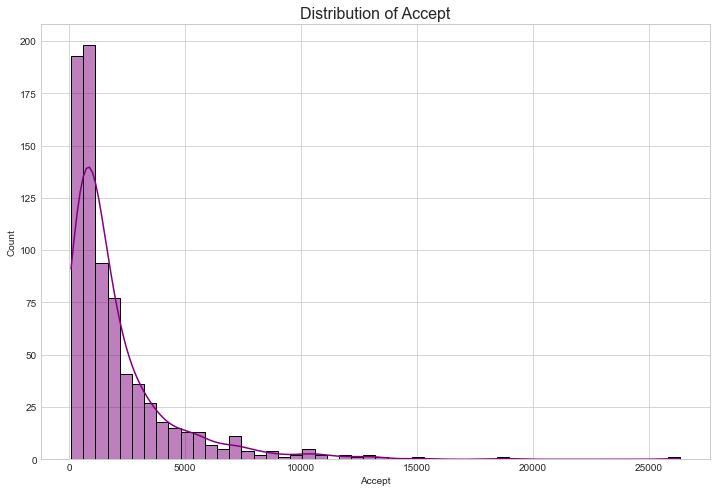

----------------------------------------------------------------------------


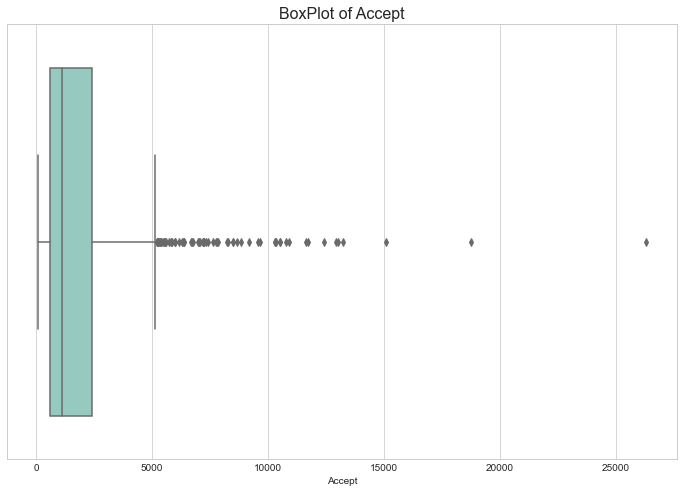

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 /b
----------------------------------------------------------------------------


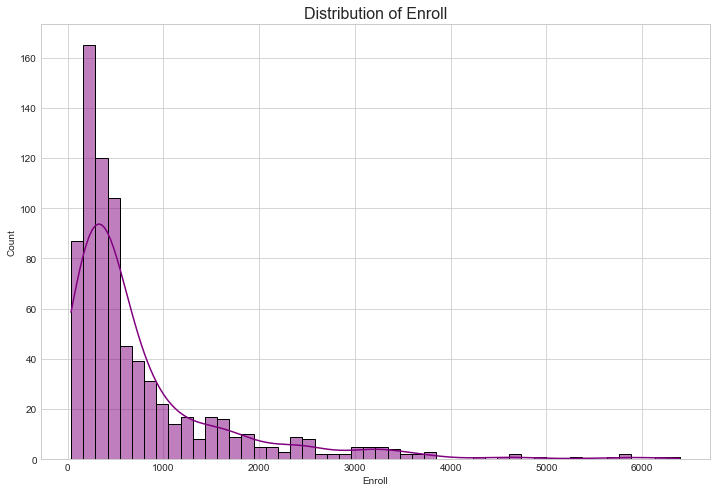

----------------------------------------------------------------------------


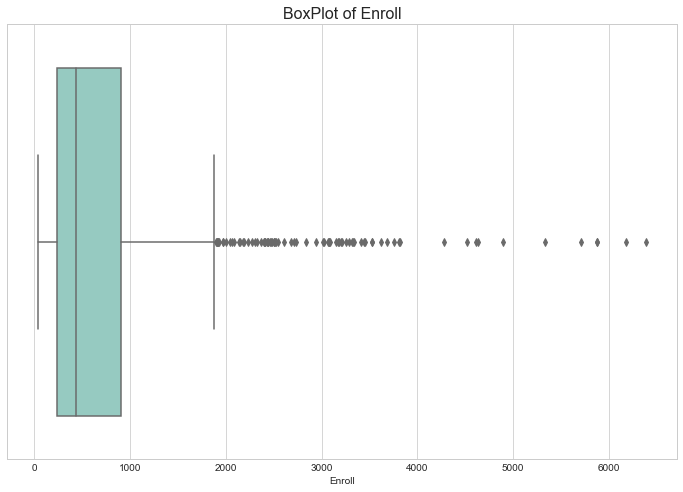

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 /b
----------------------------------------------------------------------------


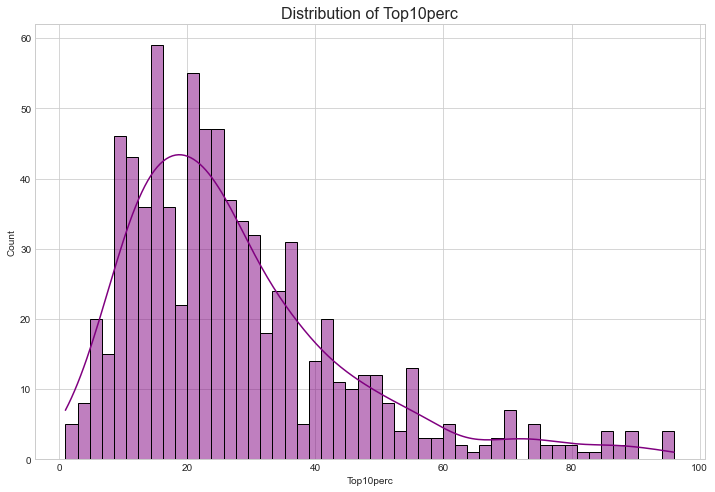

----------------------------------------------------------------------------


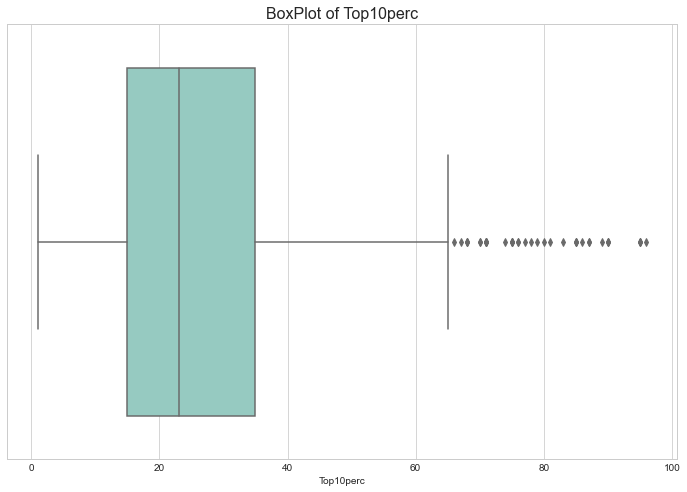

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 /b
----------------------------------------------------------------------------


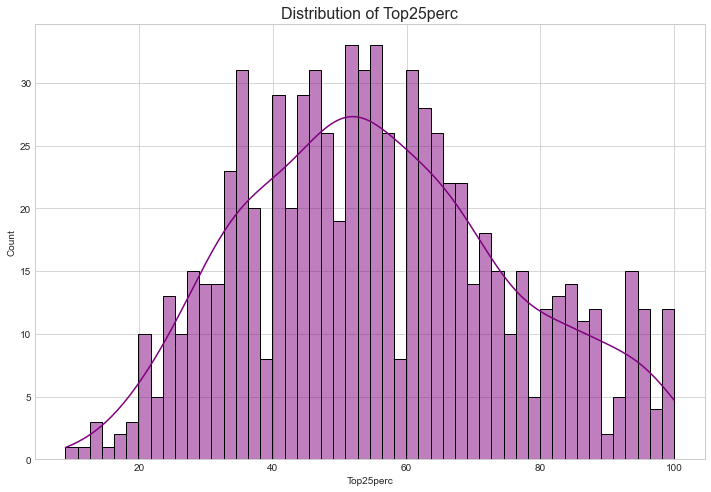

----------------------------------------------------------------------------


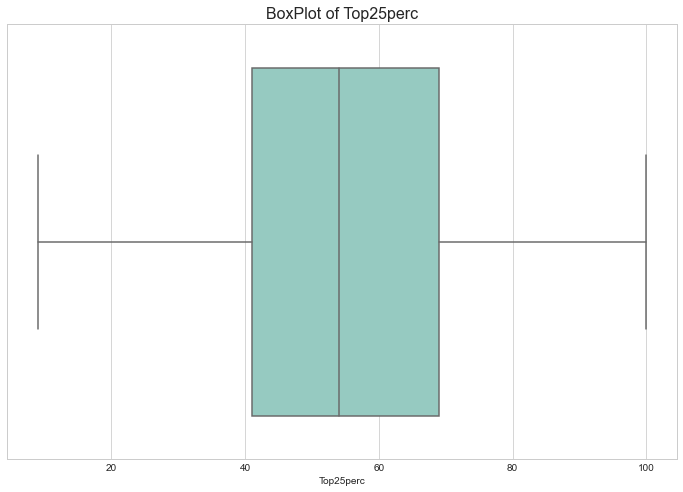

Description of F_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F_Undergrad, dtype: float64 /b
----------------------------------------------------------------------------


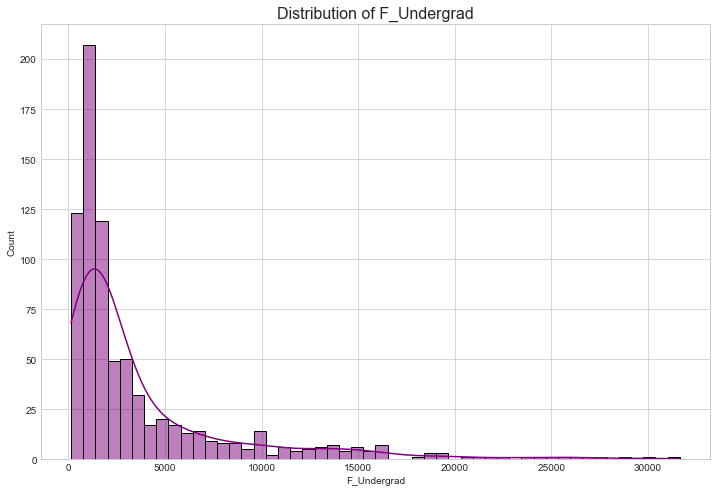

----------------------------------------------------------------------------


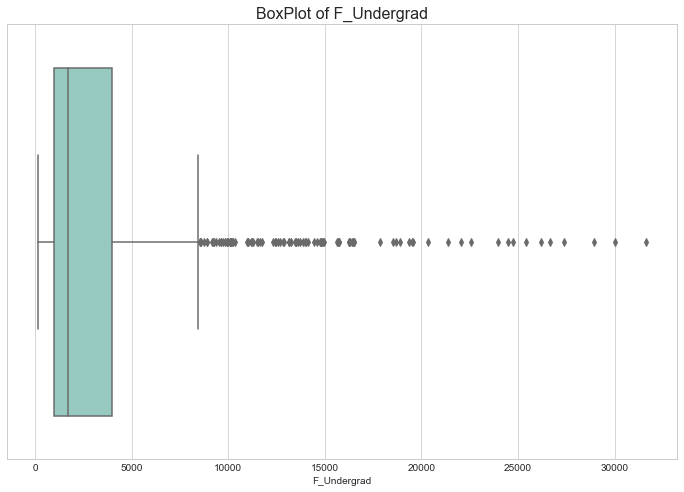

Description of P_Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P_Undergrad, dtype: float64 /b
----------------------------------------------------------------------------


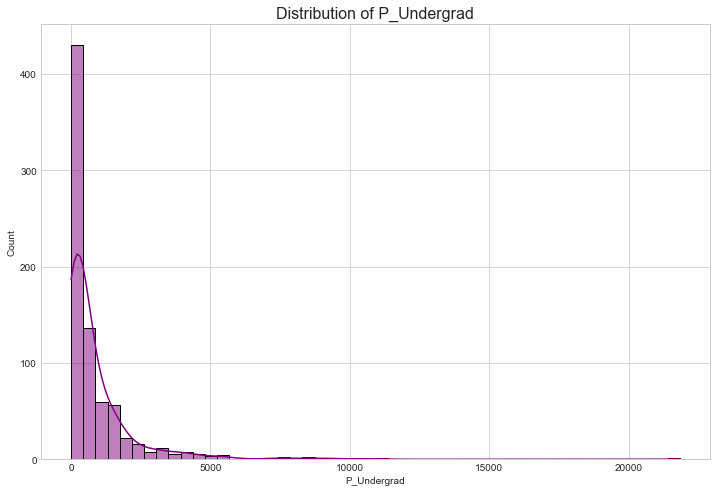

----------------------------------------------------------------------------


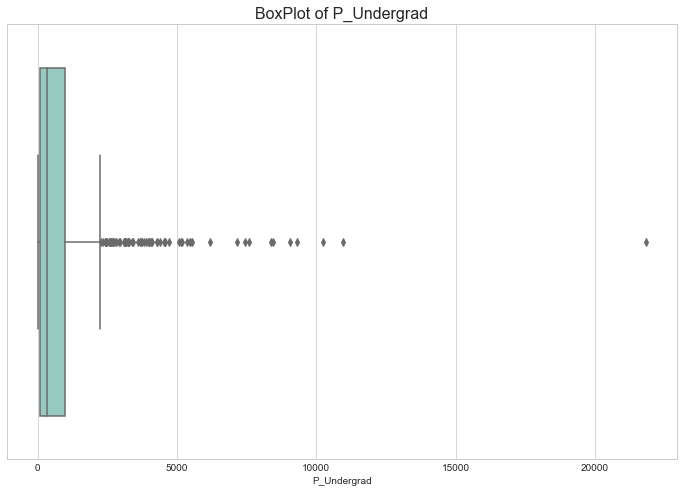

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 /b
----------------------------------------------------------------------------


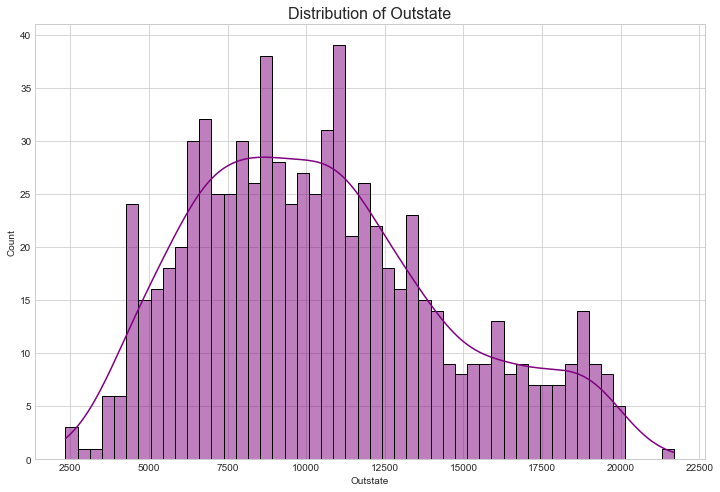

----------------------------------------------------------------------------


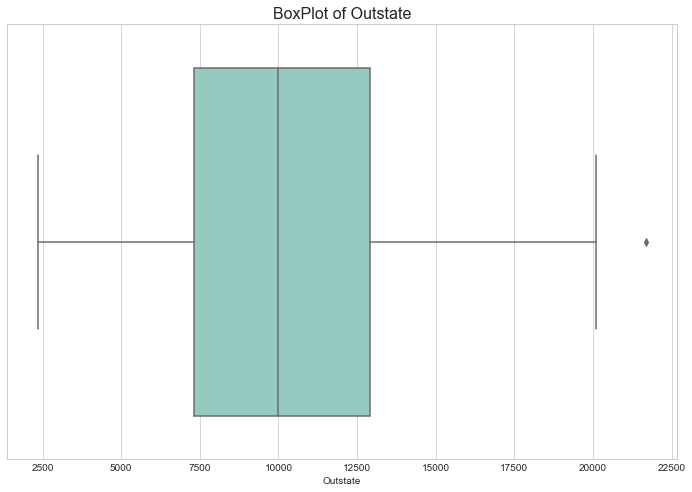

Description of Room_Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room_Board, dtype: float64 /b
----------------------------------------------------------------------------


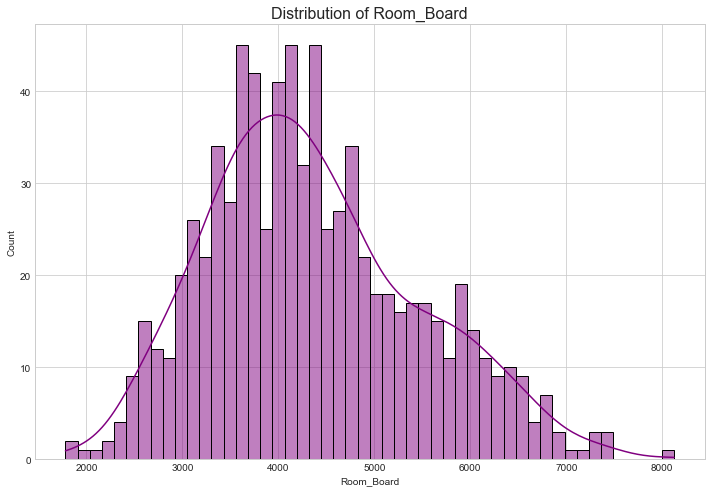

----------------------------------------------------------------------------


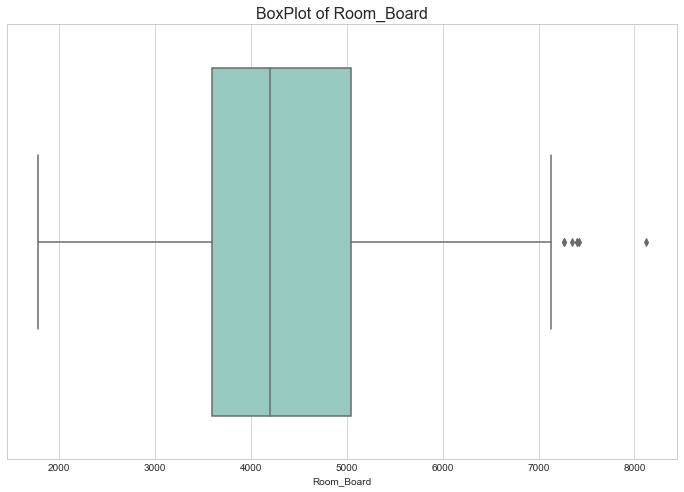

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 /b
----------------------------------------------------------------------------


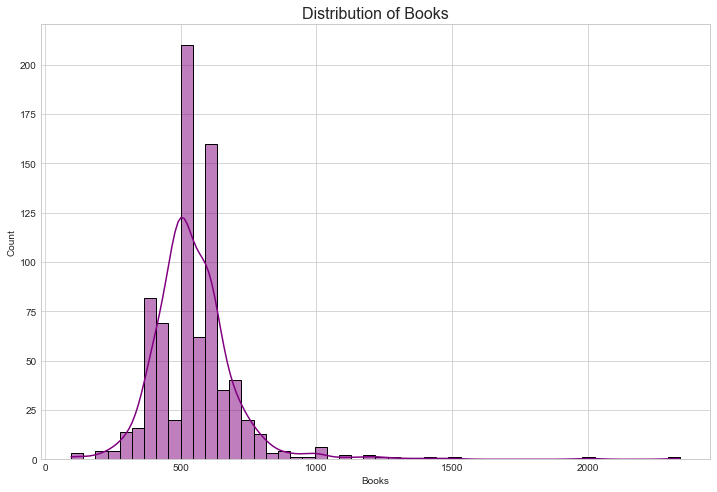

----------------------------------------------------------------------------


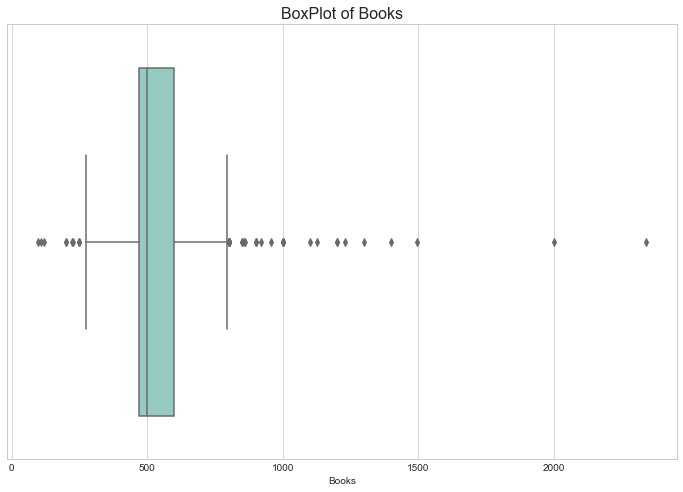

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 /b
----------------------------------------------------------------------------


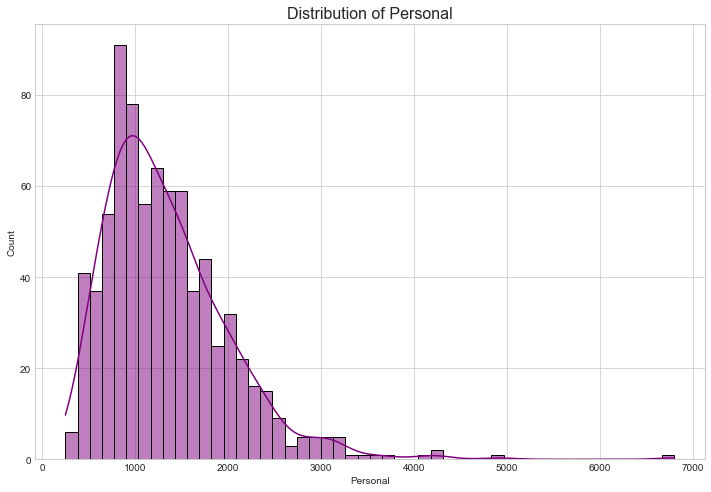

----------------------------------------------------------------------------


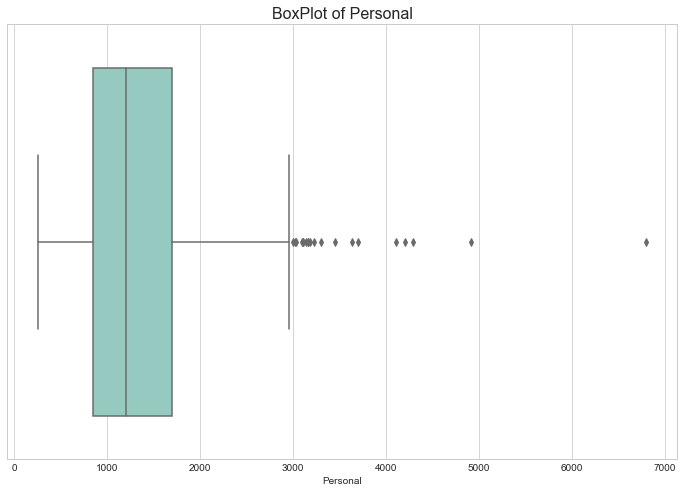

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 /b
----------------------------------------------------------------------------


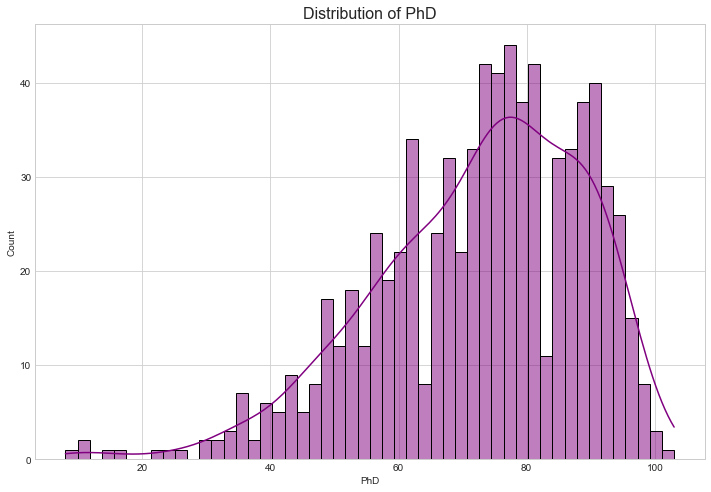

----------------------------------------------------------------------------


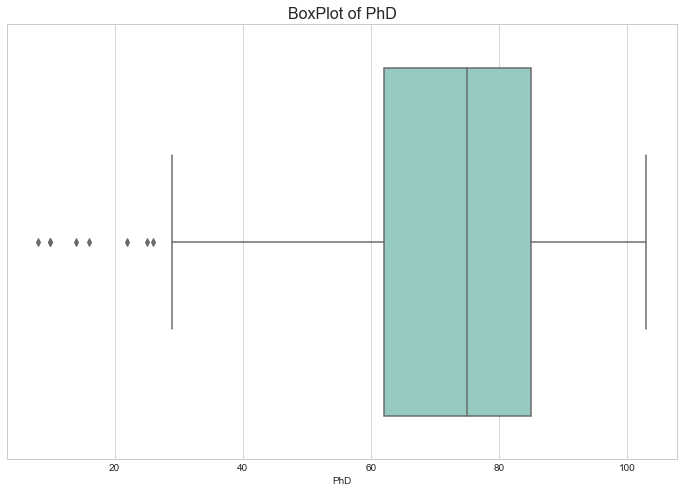

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 /b
----------------------------------------------------------------------------


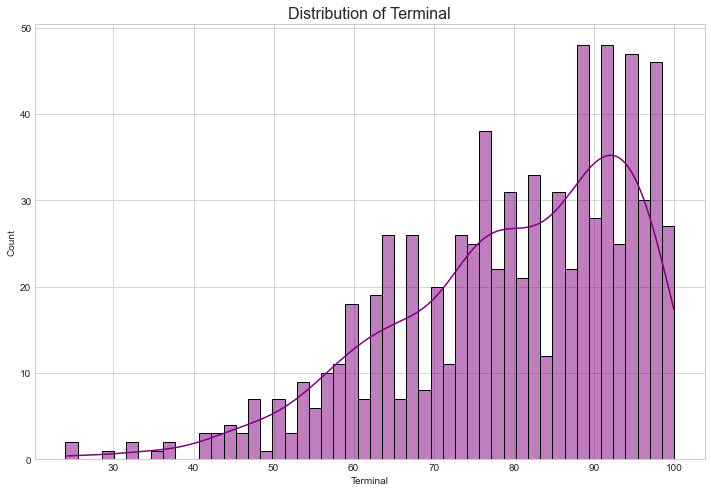

----------------------------------------------------------------------------


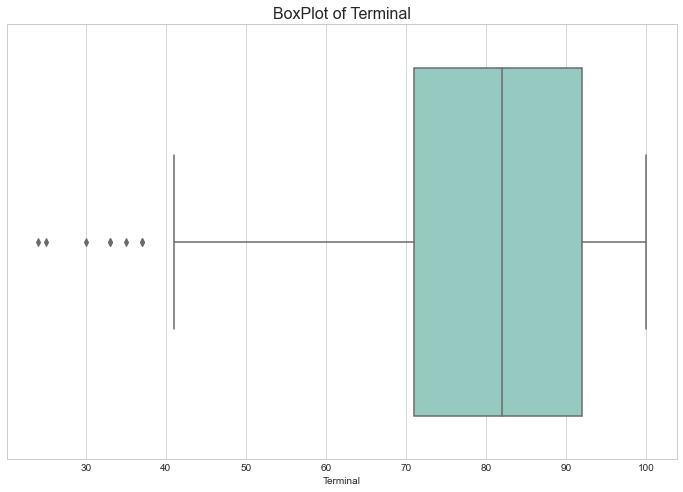

Description of S_F_Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S_F_Ratio, dtype: float64 /b
----------------------------------------------------------------------------


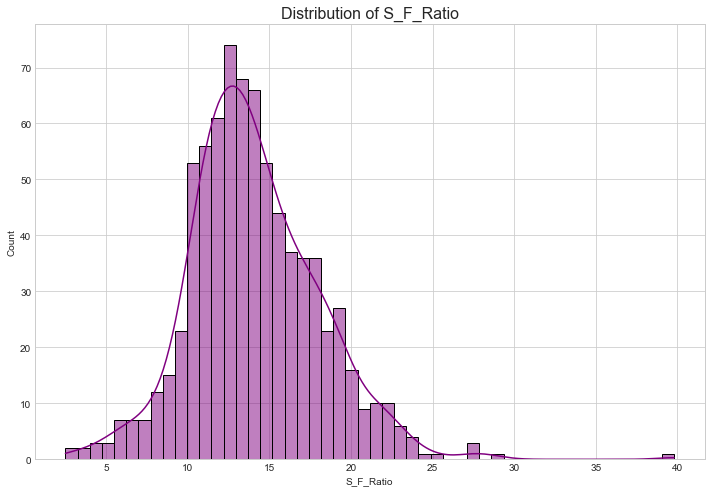

----------------------------------------------------------------------------


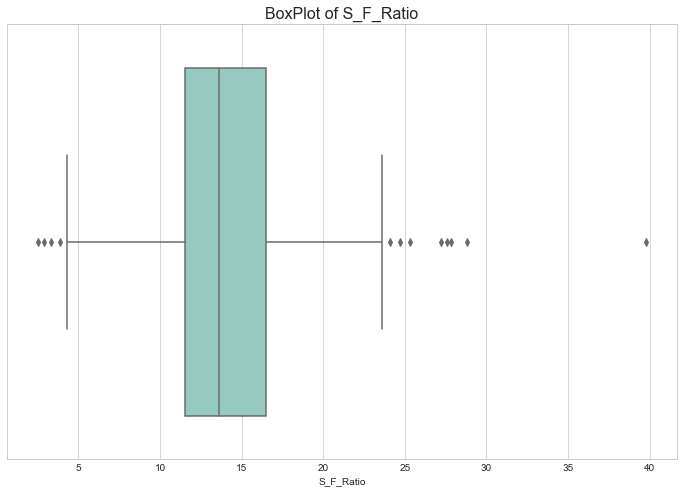

Description of Perc_Alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: Perc_Alumni, dtype: float64 /b
----------------------------------------------------------------------------


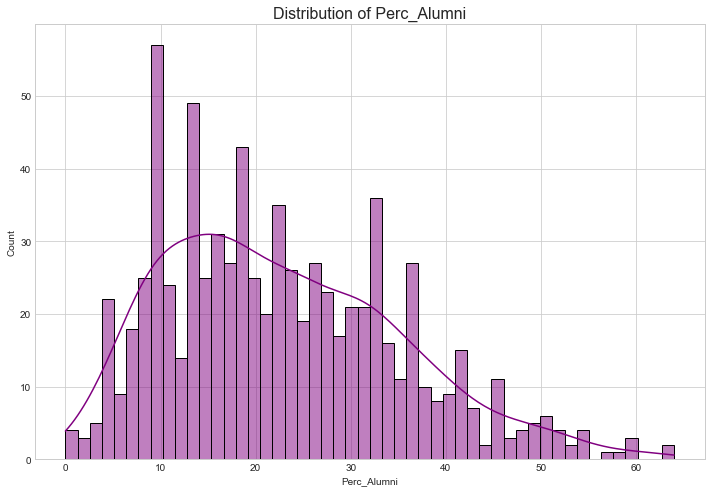

----------------------------------------------------------------------------


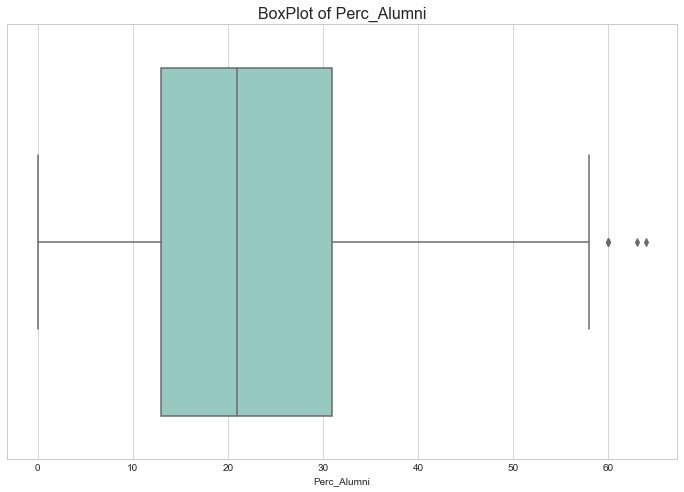

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 /b
----------------------------------------------------------------------------


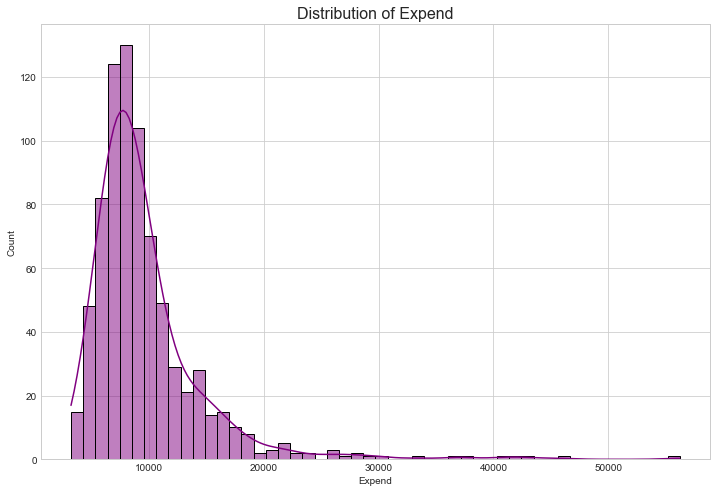

----------------------------------------------------------------------------


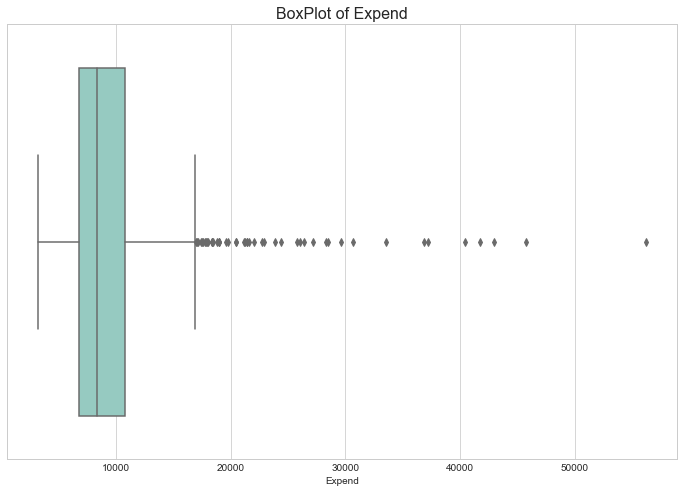

Description of Grad_Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad_Rate, dtype: float64 /b
----------------------------------------------------------------------------


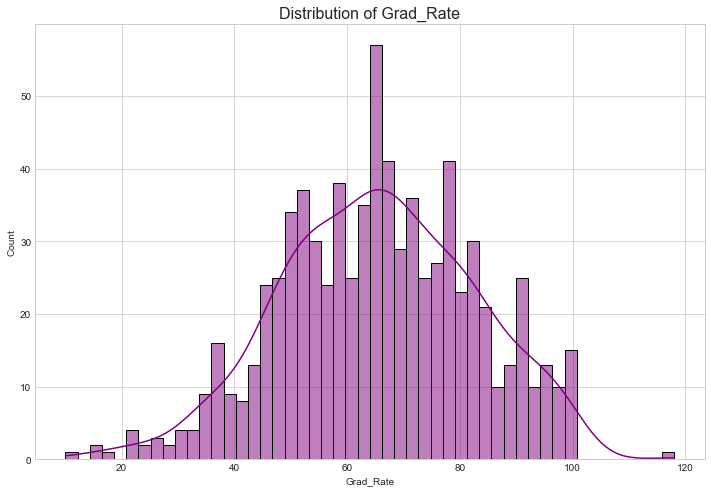

----------------------------------------------------------------------------


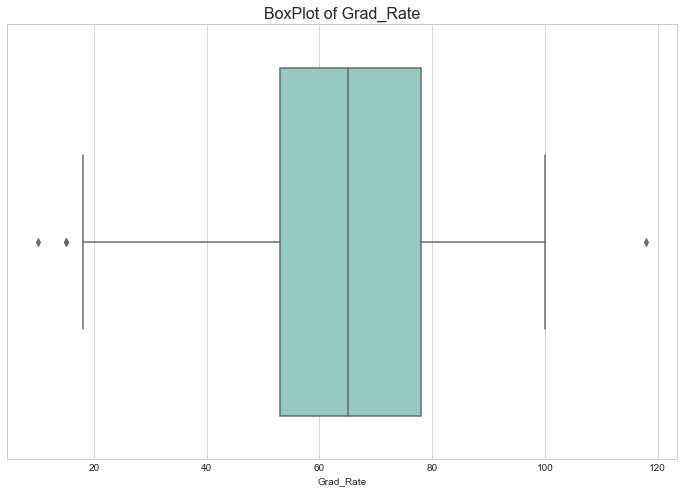

In [21]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)

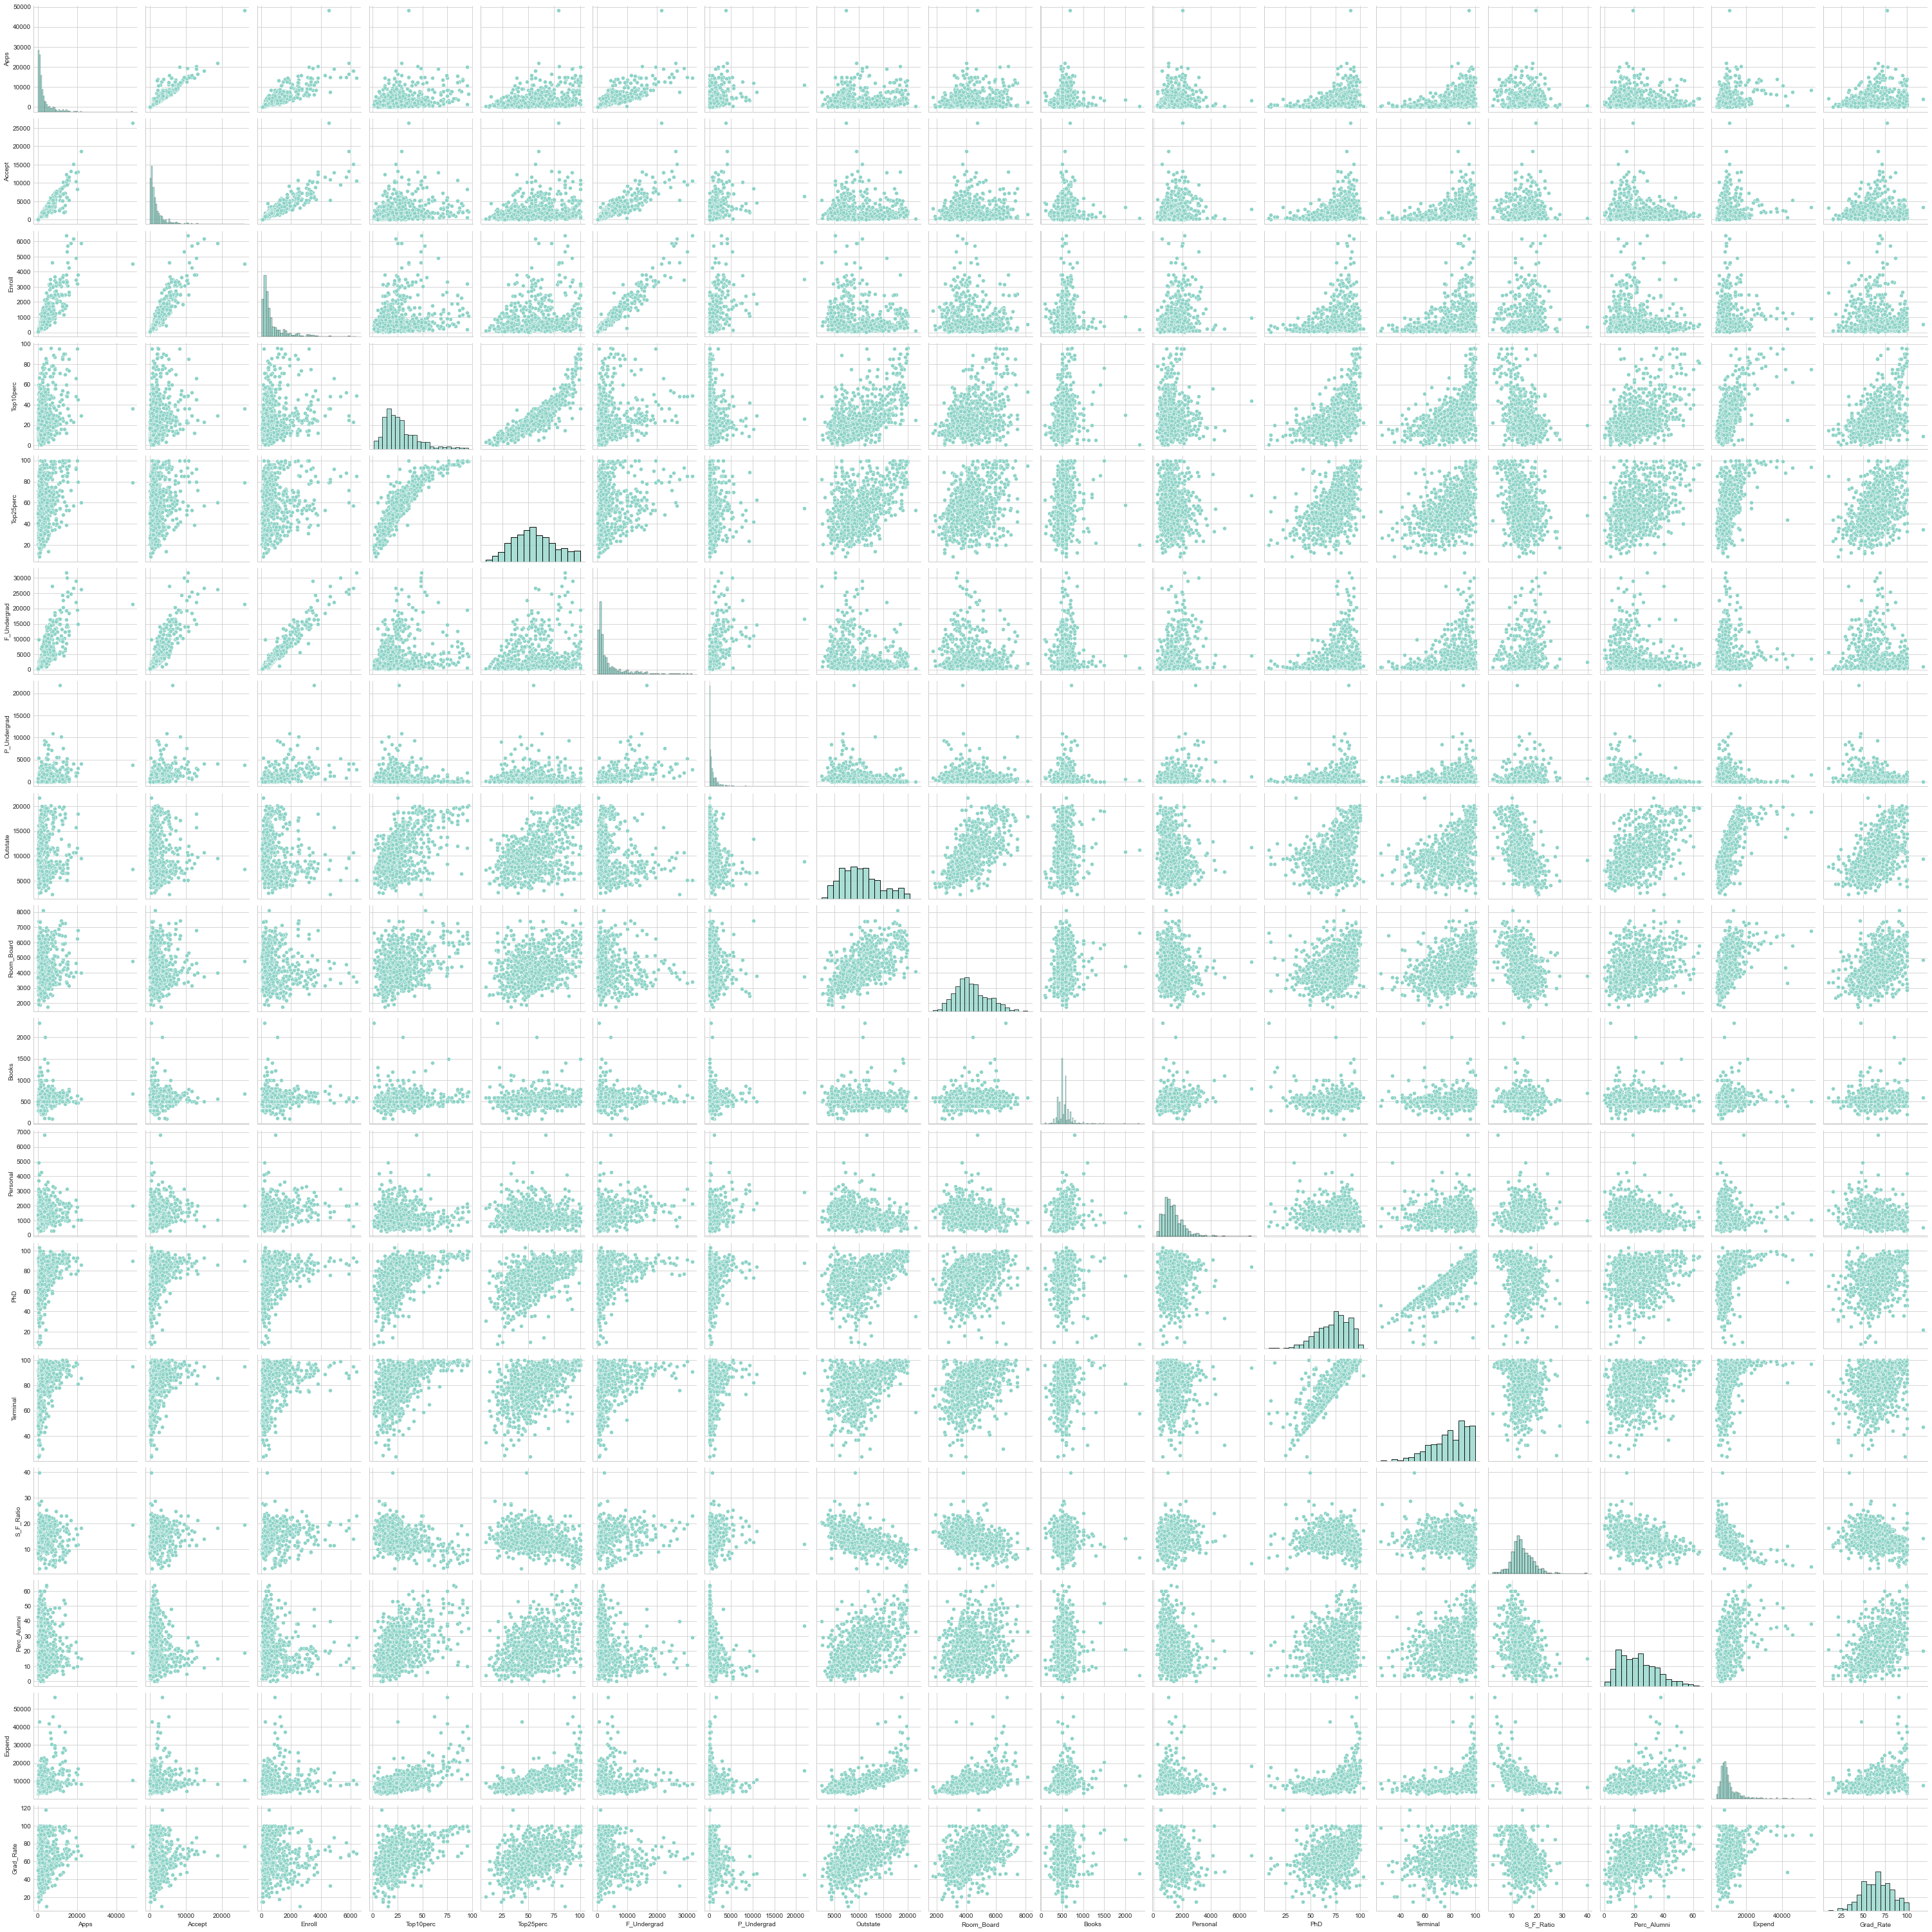

In [30]:
sns.pairplot(df)
plt.show();

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

In [31]:
df_corr=df.corr()

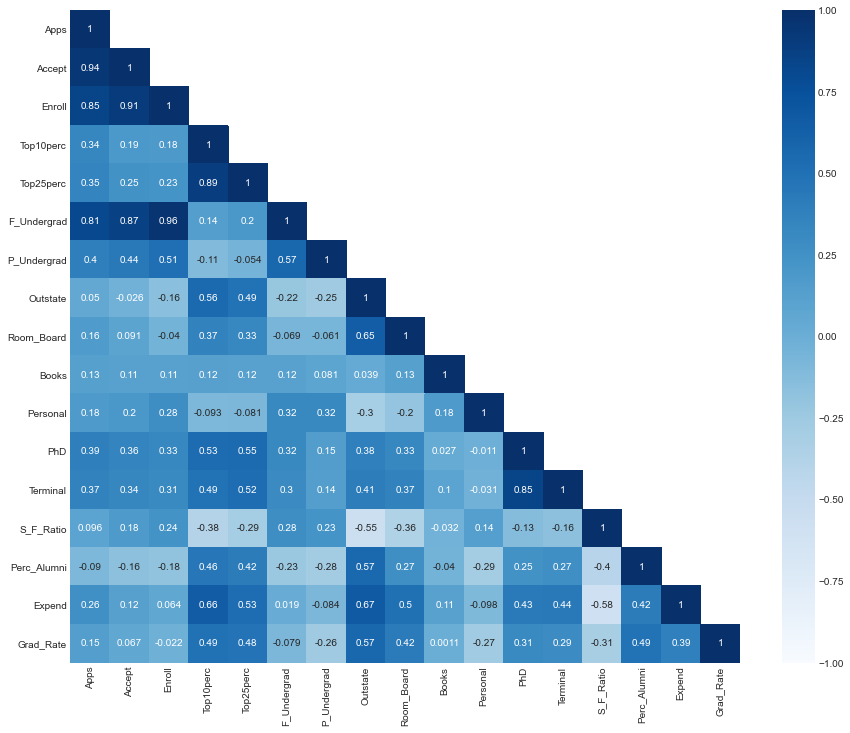

In [32]:
## Correlation Matrix
plt.figure(figsize=(15,12))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

In [9]:
df1_num=df.drop(['Names'],axis=1)

In [10]:
from scipy.stats import zscore
df1_scaled=df1_num.apply(zscore)

In [11]:
df1_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

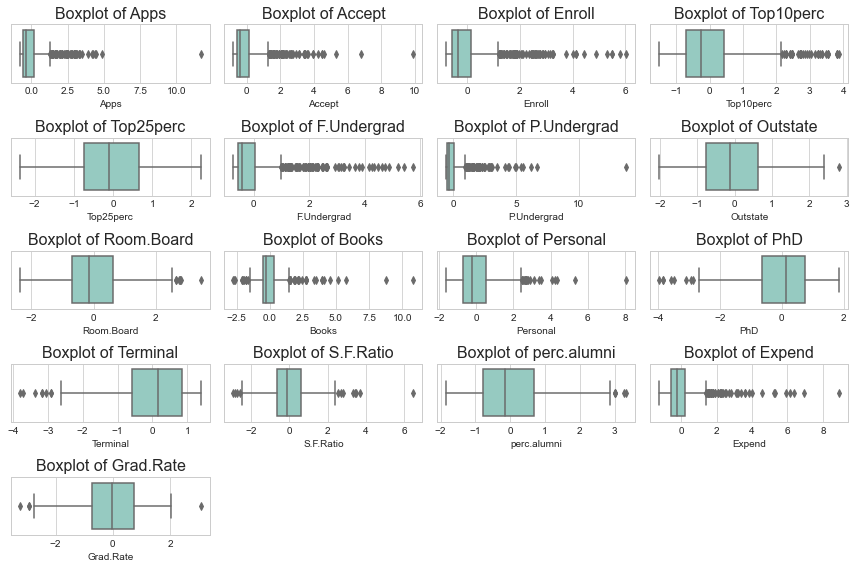

In [12]:
plt.figure(figsize=(12,8))
list_of_column=df1_num.columns

for i in range(len(list_of_column)):
    plt.subplot(5,4,i+1)
    sns.boxplot(x = df1_scaled[list_of_column[i]],data=df1_scaled)
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

In [13]:
df1_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

## 1. Bartlett Test of Sphericity

#### Compares your correlation matrix (a matrix of Pearson correlations) to the identity matrix.
#### p-value should be less than 0.05 to proceed for dimension reduction

In [14]:
#pip install factor-analyzer

In [15]:
## Null hypothesis =  All the dimensions are equal
## Alternate hypothesis  =  atleast one dimension is not equal or there is a difference in the dimensions

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_scaled)
chi_square_value, p_value

(11836.962561421795, 0.0)

**Since p=0<.05, Null will go. This implies correlations are significant. This also implies that we shall go with alternative hypothesis.It means that dimension reduction is possible in the dataset given**

## 2. Kaiser-Meyer-Olkin (KMO) Test
#### 1. KMO Test for Sample Adequacy
#### 2. KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_scaled)
print(kmo_all,kmo_model)

[0.76987176 0.74004745 0.78180611 0.75497456 0.79091631 0.81409846
 0.9109631  0.84989446 0.86258897 0.65829417 0.89150515 0.79345989
 0.78805389 0.89748336 0.91140023 0.85432115 0.91779383] 0.8131251200373522


#### Since kmo_model>0.7 Overall Measure of Sample Adequacy (MSA) is greater than 0.6. Hence we have adequate sample to proceed with PCA

In [37]:
# Applying PCA decomposition

from sklearn.decomposition import PCA
pca=PCA(n_components=17,random_state=123)
pca_transformed=pca.fit_transform(df1_scaled)

In [38]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [39]:
#Eigen Values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [40]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [41]:
#Making a dataframe

df_loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],index=df1_scaled.columns)

In [42]:
df_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

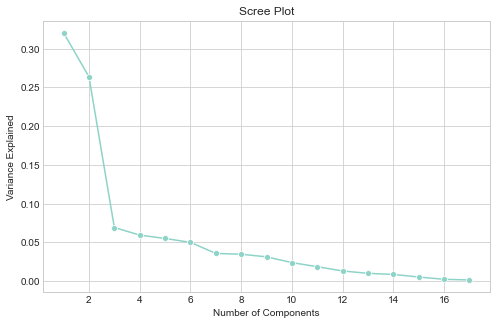

In [44]:
#Create a scree plot

plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.show()

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [46]:
df_selected=df_loadings[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]

In [47]:
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7  
Apps        -0.042486  
Accept      -0.012950  
Enroll      -0.027693  
Top10perc   -0.161332  
Top25perc   -0.118486  
F.Undergrad -0.025076  
P.Undergrad  0.061042  
Outstate     0.108529  
Room.Board   0.209744  
Books       -0.149692  
Personal     0.633790  
PhD         -0.001096  
Terminal    -0.028477  
S.F.Ratio    0.219259  
perc.alumni  0.243321  
Expend      -0.226584  
Grad.Rate    0.559944

In [49]:
# Using scikit learn PCA here. 
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
principalComponents_df = pca.fit_transform(df1_scaled)

In [51]:
## Creating a DataFrame and Printing it

df_principal_DataFrame = pd.DataFrame(data = principalComponents_df
             , columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7'])
print(df_principal_DataFrame)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220
..        ...       ...       ...       ...       ...       ...       ...
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429 -0.165021
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343  0.848453
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014 -1.317492
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937  0.083328
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893  1.307313

[777 rows x 7 columns]


In [52]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32020628 0.26340214 0.06900917 0.05922989 0.05488405 0.04984701
 0.03558871]


In [53]:
## Understanding the cummulative sum of variance explained by n features
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)
print(var)

[32.02 58.36 65.26 71.18 76.67 81.65 85.21]


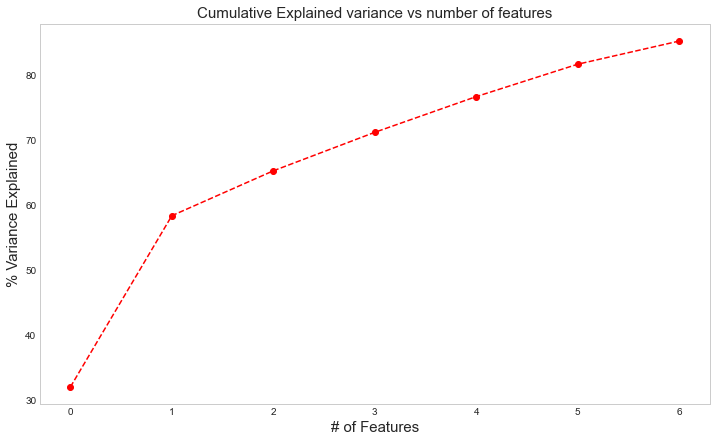

In [54]:
## Plotting the cummumative variance
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=list(df1_scaled))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944

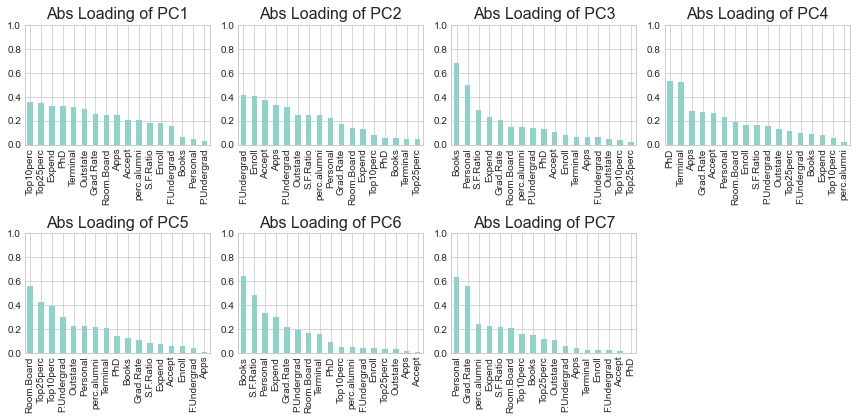

In [67]:
plt.figure(figsize=(12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,4,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending=False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs Loading of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

<AxesSubplot:>

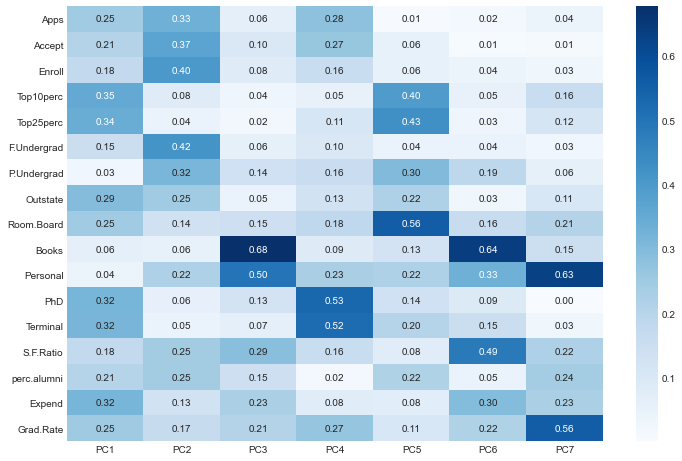

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df_selected),annot=True,cmap='Blues',fmt='.2f')

In [69]:
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7  
Apps        -0.042486  
Accept      -0.012950  
Enroll      -0.027693  
Top10perc   -0.161332  
Top25perc   -0.118486  
F.Undergrad -0.025076  
P.Undergrad  0.061042  
Outstate     0.108529  
Room.Board   0.209744  
Books       -0.149692  
Personal     0.633790  
PhD         -0.001096  
Terminal    -0.028477  
S.F.Ratio    0.219259  
perc.alumni  0.243321  
Expend      -0.226584  
Grad.Rate    0.559944

In [70]:
df1_scaled.iloc[0]

Apps          -0.346882
Accept        -0.321205
Enroll        -0.063509
Top10perc     -0.258583
Top25perc     -0.191827
F.Undergrad   -0.168116
P.Undergrad   -0.209207
Outstate      -0.746356
Room.Board    -0.964905
Books         -0.602312
Personal       1.270045
PhD           -0.163028
Terminal      -0.115729
S.F.Ratio      1.013776
perc.alumni   -0.867574
Expend        -0.501910
Grad.Rate     -0.318252
Name: 0, dtype: float64

In [71]:
for i in df_selected.columns:
    pc_score=np.dot(df_selected[i],df1_scaled.iloc[0])
    print(round(pc_score,6),end= '  ')

-1.592855  0.767334  -0.101074  -0.921749  -0.743975  -0.298306  0.638443  

<AxesSubplot:>

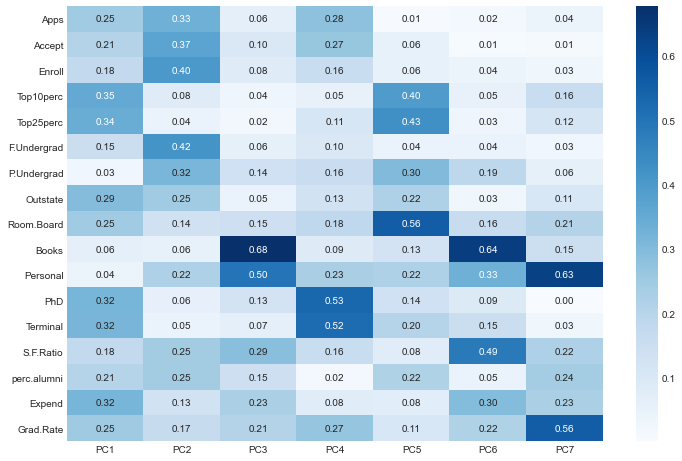

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df_selected),annot=True,cmap='Blues',fmt='.2f')

### PC & their interpretation
#### **PC1 - Top 10 perc, Top 25 perc      :               		Student Pedigree**
#### **PC2 - F.Undergrad, Enroll 			   :                  Class Size**
#### **PC3 - Books, Personal					:                 Study Expense**
#### **PC4 - PHD, Terminal 					      :                 Faculty Competence**
#### **PC5 - Room Board  					      :                 Boarding Cost**
#### **PC6 – SF Ratio, Expend					 :                Value proposition for students**
#### **PC7 - Grad Rate 				                  :                College performance**

